<a href="https://colab.research.google.com/github/Ranjitghadge/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/Ranjit_G_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [16]:
#Import require libraries.

# Import the required libraries
import scipy

import math
import random
import sklearn

import pandas as pd
import numpy as np
import seaborn as sns

from wordcloud import WordCloud 


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
#import data
df=pd.read_csv("/content/drive/MyDrive/Data Science/Almabetter/Colab Notebooks/Netflix Project/NETFLIX MOVIES AND TV SHOWS CLUSTERING (1).csv")

In [19]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [20]:
#Display column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [21]:
df.shape

(7787, 12)

In [22]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [23]:
df.describe(include=['object'])

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,2863,1608,334,3


In [24]:
df.describe(include=['object'])

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,2863,1608,334,3


Data Cleaning

In [25]:
df['director'].fillna('No Director',inplace=True)
df['cast'].fillna('No Cast',inplace=True)
df['country'].fillna('Country Unavailable', inplace=True)
df.dropna(subset=['date_added','rating'],inplace=True)

In [26]:
# Recheck presence of nulls
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

EDA


Content by type:

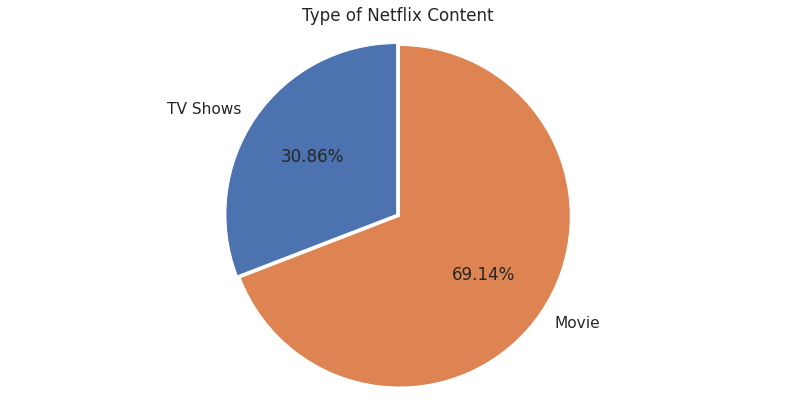

In [27]:
#Plotting a pie chart.
import matplotlib.pyplot as plt
import numpy as np
# Creating plot
plt.figure(figsize =(14, 7))
labels=['TV Shows','Movie']
plt.pie(df['type'].value_counts().sort_values(),labels=labels,explode=[0.01,0.01],
        autopct='%1.2f%%', startangle=90)
# show plot
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()

Production based on type of content & release year.

In [28]:
#Create dataframe for TV Shows & Movie
yearwise_movies= df[df.type=='TV Movies']['release_year'].value_counts().sort_index(ascending=False).head(15)
yearwise_shows= df[df.type=='TV Show']['release_year'].value_counts().sort_index(ascending=False).head(15)
total_content=df['release_year'].value_counts().sort_index(ascending=False).head(15)

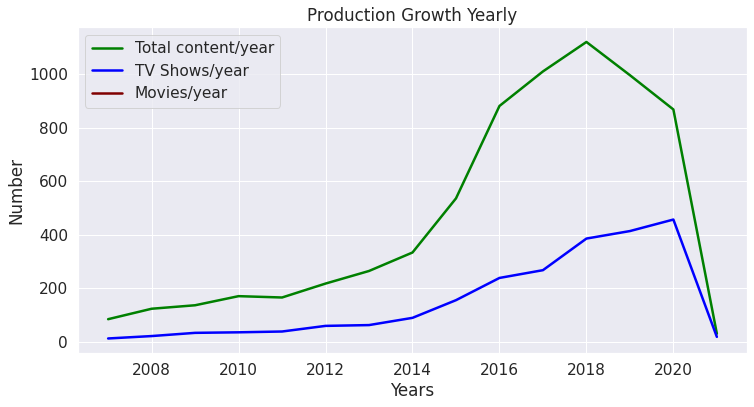

In [29]:
#Plot the number of movies across years
sns.set(font_scale=1.4)
total_content.plot(figsize=(12,6),linewidth=2.5,color='green',label="Total content/year")
yearwise_shows.plot(figsize=(12,6),linewidth=2.5,color='blue',label="TV Shows/year")
yearwise_movies.plot(figsize=(12,6),linewidth=2.5, color='maroon',label="Movies/year")

plt.xlabel("Years")
plt.ylabel("Number")
plt.legend()

plt.title('Production Growth Yearly')
  
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()

Release year

In [30]:
df.release_year.unique()

array([2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015,
       2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963,
       1964, 1954, 1970, 1944, 1947, 1959, 1943])

In [31]:
df['release_year'].value_counts().to_frame()

,release_year
2018,1120
2017,1010
2019,996
2016,881
2020,868
...,...
1925,1
1964,1
1966,1
1947,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


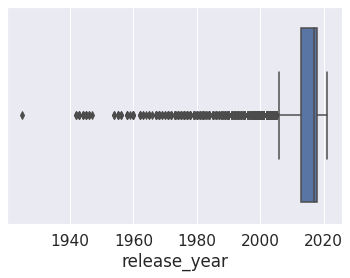

In [32]:
#Box Plot
sns.boxplot(df.release_year)

In [33]:
#Find out IQR for release year

release_year_Q1 = df.release_year.quantile(0.25)
release_year_Q3 = df.release_year.quantile(0.75)
release_year_IQR = release_year_Q3 - release_year_Q1
print(f'release_year_Q1 = {release_year_Q1}\nrelease_year_Q3 = {release_year_Q3}\nrelease_year_IQR = {release_year_IQR}')


release_year_Q1 = 2013.0
release_year_Q3 = 2018.0
release_year_IQR = 5.0


In [34]:
release_year_outliers = df[(df.release_year < (release_year_Q1 - 1.5 * release_year_IQR)) |
                           ( df.release_year > (release_year_Q3 + 1.5 * release_year_IQR)) ]

In [35]:
np.percentile(df["release_year"],1)

1974.0

In [36]:
#replacing outliers with means
df["release_year"] = np.where(df["release_year"] <2010, df.release_year.mean(),df['release_year'])

In [37]:
df.release_year.describe()


count    7770.000000
mean     2016.349312
std         2.567764
min      2010.000000
25%      2013.935393
50%      2017.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


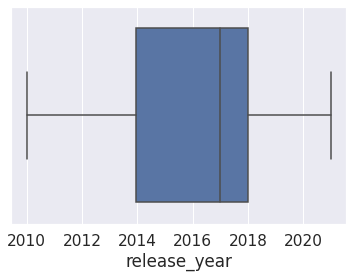

In [38]:
#Box plot
sns.boxplot(df.release_year)

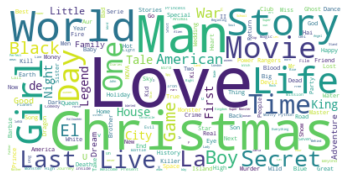

In [39]:
#subsetting df
df_wordcloud = df['title']
text = " ".join(word for word in df_wordcloud)
# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Relaese years of Movies

Country VS Rating

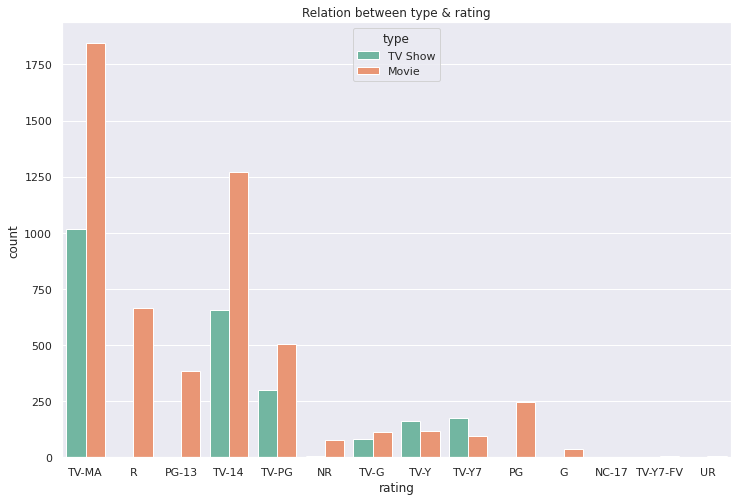

In [47]:
#Graph of diffrenet rating on movies & TV shows
plt.figure(figsize=(12,8))
sns.countplot(x='rating',hue='type',data=df,palette="Set2")
plt.title('Relation between type & rating')
plt.show()

Most of movies & tv shows having high rating of Mature Audience

Content of countries

In [55]:
df['country'].value_counts().head(10)

United States          2546
India                   923
Country Unavailable     505
United Kingdom          396
Japan                   224
South Korea             183
Canada                  177
Spain                   134
France                  115
Egypt                   101
Name: country, dtype: int64

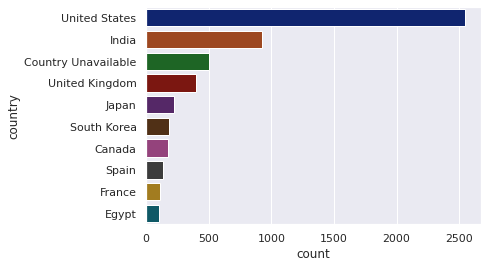

In [59]:
#Countplot of country
sns.countplot(y='country',data = df,palette='dark',order=df['country'].value_counts().index[0:10] )

United States & India are top two countries having most of content.

###Content added monthwise

In [69]:
df['month']=df['date_added'].str.split(' ').str[0]
df['month']

0          August
1        December
2        December
3        November
4         January
          ...    
7782      October
7783        March
7784    September
7785      October
7786        March
Name: month, Length: 7770, dtype: object

In [73]:
month_df=df['month'].value_counts().reset_index()
month_df.rename(columns={'index':'Month_Name'}, inplace=True)
month_df.rename(columns={'month': 'Count'}, inplace=True)
ten_counts=month_df.loc[0:10]
ten_counts

,Month_Name,Count
0,December,816
1,October,780
2,January,745
3,November,730
4,March,660
5,September,613
6,August,611
7,April,595
8,July,592
9,June,538


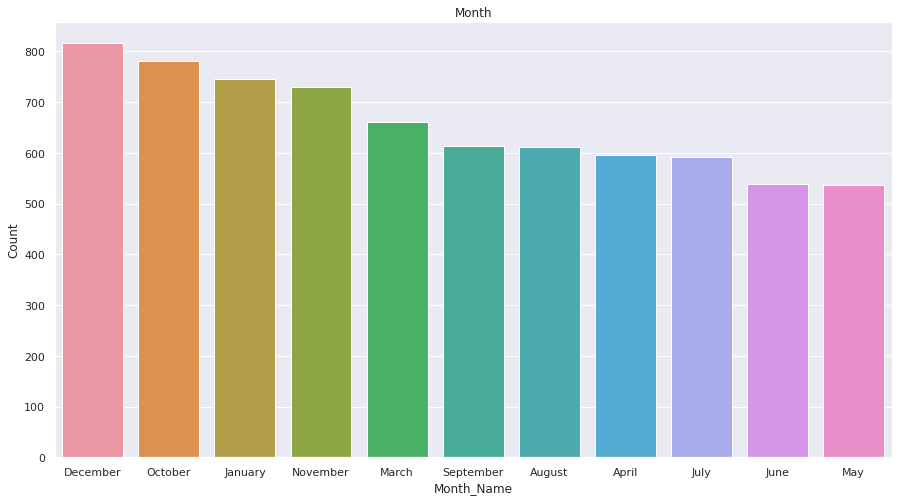

In [76]:
#monthwise content
plt.figure(figsize=(15,8))
plt.title('Month')
sns.barplot(x='Month_Name', y='Count',data=ten_counts)